In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# Rest of your code goes here...


In [2]:
import tensorflow as tf

# Create a TensorFlow session and set the GPU device
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Specify the GPU device index to use (e.g., 1 for GPU 1)
    gpu_index = 1
    try:
        tf.config.experimental.set_visible_devices(gpus[gpu_index], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        print(e)

# Rest of your code goes here...


In [3]:
import keras,os
from keras.datasets import fashion_mnist, cifar100
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras import optimizers
from keras.layers.core import Lambda
from keras import backend as K

In [4]:
from keras import regularizers
from sklearn import datasets # load dataset
from sklearn.model_selection import train_test_split # split dataset
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.metrics import accuracy_score # check accuracy

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#import keras
import tensorflow as tf
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import cv2

In [6]:
#path="C:/Users/year1/Downloads/Dataset2"
#path="C:/Users/gaura/Downloads/Dataset2"
path="D:/Work3/data"

face_types=os.listdir(path)
print(face_types)

print("types of faces found:",len(face_types))

['Fake', 'Real']
types of faces found: 2


In [7]:
faces=[]

for item in face_types:
    all_faces=os.listdir(path + '/' + item)

    for face in all_faces:
        faces.append((item,str(path+'/'+item)+'/'+face))
        #print(faces[:1])

In [8]:
# Build a dataframe        
faces_df = pd.DataFrame(data=faces, columns=['face type', 'image'])
print(faces_df.head())
print(faces_df.tail())

  face type                              image
0      Fake  D:/Work3/data/Fake/001ge535Bm.jpg
1      Fake  D:/Work3/data/Fake/001hdhhnuc.jpg
2      Fake  D:/Work3/data/Fake/002SKHhAie.jpg
3      Fake  D:/Work3/data/Fake/0079clRuae.jpg
4      Fake  D:/Work3/data/Fake/007q2OqN7d.jpg
       face type                              image
189997      Real  D:/Work3/data/Real/zZXtzvIZZZ.jpg
189998      Real  D:/Work3/data/Real/zZyDfRmvuV.jpg
189999      Real  D:/Work3/data/Real/zzyNp5GKsn.jpg
190000      Real  D:/Work3/data/Real/zzZ4qLg3hD.jpg
190001      Real  D:/Work3/data/Real/zZZMOUcxRi.jpg


In [9]:
# ignore if correct resized folder exists
#creates resized folder
import cv2
import cv2
import os

#path = "C:/Users/year1/Downloads/Dataset2"
#path="C:/Users/gaura/Downloads/Dataset2"
path="D:/Work3/data"
im_size = 128
batch_size = 1900  # adjust batch size as needed

def image_generator():
    for i in face_types:
        data_path = os.path.join(path, str(i))
        filenames = os.listdir(data_path)
        for j in range(0, len(filenames), batch_size):
            batch_filenames = filenames[j:j+batch_size]
            batch_images = []
            batch_labels = []
            for f in batch_filenames:
                img = cv2.imread(os.path.join(data_path, f))
                if img is None:
                    print(f"Error: failed to read {os.path.join(data_path, f)}")
                    continue
                img = cv2.resize(img, (im_size, im_size))
                filename = os.path.splitext(f)[0] + '.jpg'  # change extension to .jpg
                filepath = os.path.join(data_path, 'resized', filename)  # create output path
                cv2.imwrite(filepath, img)  # write resized image to disk
                batch_images.append(filepath)  # append file path to batch
                batch_labels.append(i)
            yield batch_images, np.array(batch_labels)

# create output directories
for i in face_types:
    os.makedirs(os.path.join(path, str(i), 'resized'), exist_ok=True) # change for different network

# Example usage
gen = image_generator()
for i in range(101):  # load 10 batches
    batch_images, batch_labels = next(gen)
    print(f"Loaded batch {i+1} with {len(batch_images)} images")


Loaded batch 1 with 1900 images
Loaded batch 2 with 1900 images
Loaded batch 3 with 1900 images
Loaded batch 4 with 1900 images
Loaded batch 5 with 1900 images
Loaded batch 6 with 1900 images
Loaded batch 7 with 1900 images
Loaded batch 8 with 1900 images
Loaded batch 9 with 1900 images
Loaded batch 10 with 1900 images
Loaded batch 11 with 1900 images
Loaded batch 12 with 1900 images
Loaded batch 13 with 1900 images
Loaded batch 14 with 1900 images
Loaded batch 15 with 1900 images
Loaded batch 16 with 1900 images
Loaded batch 17 with 1900 images
Loaded batch 18 with 1900 images
Loaded batch 19 with 1900 images
Loaded batch 20 with 1900 images
Loaded batch 21 with 1900 images
Loaded batch 22 with 1900 images
Loaded batch 23 with 1900 images
Loaded batch 24 with 1900 images
Loaded batch 25 with 1900 images
Loaded batch 26 with 1900 images
Loaded batch 27 with 1900 images
Loaded batch 28 with 1900 images
Loaded batch 29 with 1900 images
Loaded batch 30 with 1900 images
Loaded batch 31 wit

In [9]:
#ignore for now
#creates images.h5
# check if real has correct number of images
import os 
import cv2 
import numpy as np 
import h5py 
#path = "C:/Users/year1/Downloads/Dataset2/" 
#path="C:/Users/gaura/Downloads/Dataset2"
path="D:/Work3/data"
im_size = 128 
images = [] 
for i in face_types: 
    data_path = os.path.join(path, str(i), 'resized') 
    filenames = os.listdir(data_path) 
    for f in filenames: 
        filepath = os.path.join(data_path, f) 
        images.append(filepath) 
with h5py.File('images_inception.h5', 'w') as f: 
    dset = f.create_dataset('images', shape=(len(images), im_size, im_size, 3), dtype='float16')
    for i, filepath in enumerate(images): 
        img = cv2.imread(filepath) 
        img = cv2.resize(img, (im_size, im_size)) 
        img = img.astype('float16') / 255.0 
        dset[i] = img 
with h5py.File('images_inception.h5', 'r') as f: 
    dset = f['images'] 
    for i in range(len(images)): 
        img = dset[i]

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Convert labels to numerical values using label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(faces_df['face type'].values)

# Perform one hot encoding on the numerical labels
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y.reshape(-1, 1))

In [11]:
#custom
from keras.models import Sequential
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(128,128,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(2))
model.add(Activation('softmax'))
#model.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])# optimizer didnt have tf
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 activation (Activation)     (None, 126, 126, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 61, 61, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [12]:
#path_test="C:/Users/year1/Downloads/Dataset_Copy_test"
#path_test="C:/Users/gaura/Downloads/Dataset_Copy_test3"
path_test="D:/WORK/Dataset_Copy_test3"
face_types_test=os.listdir(path_test)
print(face_types_test)

print("types of faces found:",len(face_types_test))

['Fake', 'Real']
types of faces found: 2


In [13]:
faces_test=[]

for item in face_types_test:
    all_faces_test=os.listdir(path_test + '/' + item)

    for face in all_faces_test:
        faces_test.append((item,str(path_test+'/'+item)+'/'+face))
        #print(faces[:1])

In [14]:
faces_df_test = pd.DataFrame(data=faces_test, columns=['face type', 'image'])
print(faces_df_test.head())
print(faces_df_test.tail())

  face type                                           image
0      Fake  D:/WORK/Dataset_Copy_test3/Fake/0052ETBQFB.jpg
1      Fake  D:/WORK/Dataset_Copy_test3/Fake/053UBPVSLY.jpg
2      Fake  D:/WORK/Dataset_Copy_test3/Fake/056F3HHA5C.jpg
3      Fake  D:/WORK/Dataset_Copy_test3/Fake/056XH8KUI0.jpg
4      Fake  D:/WORK/Dataset_Copy_test3/Fake/058KLRF8OA.jpg
     face type                                              image
1995      Real  D:/WORK/Dataset_Copy_test3/Real/67_0_0_2017010...
1996      Real  D:/WORK/Dataset_Copy_test3/Real/67_0_0_2017010...
1997      Real  D:/WORK/Dataset_Copy_test3/Real/67_0_0_2017010...
1998      Real  D:/WORK/Dataset_Copy_test3/Real/67_0_0_2017010...
1999      Real  D:/WORK/Dataset_Copy_test3/Real/67_0_0_2017010...


In [15]:
import cv2
import numpy as np
import os

#path = "C:/Users/year1/Downloads/Dataset_Copy_test"
#path ="C:/Users/gaura/Downloads/Dataset_Copy_test3"
path="D:/WORK/Dataset_Copy_test3"
im_size = 128
face_types = ['Fake','Real']

label_map_test = {label: idx for idx, label in enumerate(face_types)}

images_test = []
labels_test = []

for label in face_types:
    data_path = os.path.join(path, label)
    filenames = [os.path.join(data_path, f) for f in os.listdir(data_path)]
   
    for filename in filenames:
        img = cv2.imread(filename)
        img = cv2.resize(img, (im_size, im_size))
        images_test.append(img)
        labels_test.append(label_map_test[label])

images_test = np.array(images_test, dtype=np.float32)
labels_test = np.array(labels_test, dtype=np.int32)

In [16]:
images_test = np.array(images_test)

images_test.shape

images_test = images_test.astype('float16') / 255.0

images_test.shape

#images = np.array(images, dtype='float32') / 255.0

(2000, 128, 128, 3)

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Convert labels to numerical values using label encoding
label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(faces_df_test['face type'].values)

# Perform one hot encoding on the numerical labels
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot_test = onehot_encoder.fit_transform(y_test.reshape(-1, 1))

In [18]:
images_test, y_onehot_test = shuffle(images_test, y_onehot_test, random_state=7)

x_train,x_test,y_train,y_test = train_test_split(images_test, y_onehot_test, test_size=0.9, random_state=15)


processing 1.0 epoch 1
57/57 [==============================] - 4s 65ms/step - loss: 0.8247 - accuracy: 0.5061
processing 2.0 epoch 1
57/57 [==============================] - 4s 68ms/step - loss: 0.6833 - accuracy: 0.5061
processing 3.0 epoch 1
57/57 [==============================] - 4s 67ms/step - loss: 0.6832 - accuracy: 0.6856
processing 4.0 epoch 1
57/57 [==============================] - 3s 60ms/step - loss: 0.6804 - accuracy: 0.6711
processing 5.0 epoch 1
57/57 [==============================] - 4s 62ms/step - loss: 0.6723 - accuracy: 0.7800
processing 6.0 epoch 1
57/57 [==============================] - 3s 59ms/step - loss: 0.6591 - accuracy: 0.7572
processing 7.0 epoch 1
57/57 [==============================] - 4s 65ms/step - loss: 0.6373 - accuracy: 0.7983
processing 8.0 epoch 1
57/57 [==============================] - 4s 64ms/step - loss: 0.6081 - accuracy: 0.8061
processing 9.0 epoch 1
57/57 [==============================] - 3s 60ms/step - loss: 0.5689 - accuracy: 0.8206
p

57/57 [==============================] - 3s 60ms/step - loss: 0.0809 - accuracy: 0.9700
processing 75.0 epoch 1
57/57 [==============================] - 3s 60ms/step - loss: 0.0897 - accuracy: 0.9694
processing 76.0 epoch 1
57/57 [==============================] - 3s 60ms/step - loss: 0.0906 - accuracy: 0.9700
processing 77.0 epoch 1
57/57 [==============================] - 3s 60ms/step - loss: 0.0674 - accuracy: 0.9767
processing 78.0 epoch 1
57/57 [==============================] - 3s 59ms/step - loss: 0.0634 - accuracy: 0.9767
processing 79.0 epoch 1
57/57 [==============================] - 3s 59ms/step - loss: 0.0885 - accuracy: 0.9706
processing 80.0 epoch 1
57/57 [==============================] - 3s 60ms/step - loss: 0.1201 - accuracy: 0.9594
processing 81.0 epoch 1
57/57 [==============================] - 3s 60ms/step - loss: 0.0922 - accuracy: 0.9700
processing 82.0 epoch 1
57/57 [==============================] - 3s 60ms/step - loss: 0.0588 - accuracy: 0.9767
processing 83.0 

57/57 [==============================] - 6s 98ms/step - loss: 0.0421 - accuracy: 0.9861
processing 219.0 epoch 1
57/57 [==============================] - 6s 98ms/step - loss: 0.0476 - accuracy: 0.9850
processing 220.0 epoch 1
57/57 [==============================] - 6s 99ms/step - loss: 0.0440 - accuracy: 0.9861
processing 221.0 epoch 1
57/57 [==============================] - 6s 97ms/step - loss: 0.0340 - accuracy: 0.9883
processing 222.0 epoch 1
57/57 [==============================] - 6s 97ms/step - loss: 0.0282 - accuracy: 0.9872
processing 223.0 epoch 1
57/57 [==============================] - 6s 98ms/step - loss: 0.0297 - accuracy: 0.9872
processing 224.0 epoch 1
57/57 [==============================] - 6s 96ms/step - loss: 0.0291 - accuracy: 0.9872
processing 225.0 epoch 1
57/57 [==============================] - 5s 95ms/step - loss: 0.0320 - accuracy: 0.9872
processing 226.0 epoch 1
57/57 [==============================] - 4s 67ms/step - loss: 0.0418 - accuracy: 0.9872
processi

57/57 [==============================] - 4s 70ms/step - loss: 0.0267 - accuracy: 0.9900
processing 363.0 epoch 1
57/57 [==============================] - 4s 73ms/step - loss: 0.0262 - accuracy: 0.9906
processing 364.0 epoch 1
57/57 [==============================] - 4s 68ms/step - loss: 0.0265 - accuracy: 0.9911
processing 365.0 epoch 1
57/57 [==============================] - 4s 64ms/step - loss: 0.0273 - accuracy: 0.9906
processing 366.0 epoch 1
57/57 [==============================] - 4s 70ms/step - loss: 0.0279 - accuracy: 0.9906
processing 367.0 epoch 1
57/57 [==============================] - 4s 70ms/step - loss: 0.0256 - accuracy: 0.9906
processing 368.0 epoch 1
57/57 [==============================] - 4s 64ms/step - loss: 0.0246 - accuracy: 0.9911
processing 369.0 epoch 1
57/57 [==============================] - 4s 66ms/step - loss: 0.0250 - accuracy: 0.9900
processing 370.0 epoch 1
57/57 [==============================] - 4s 73ms/step - loss: 0.0253 - accuracy: 0.9906
processi

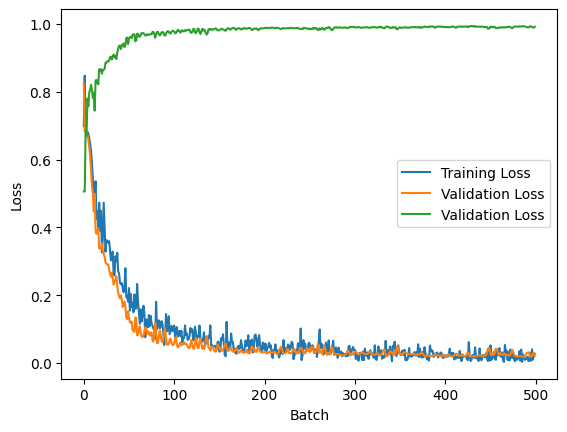

In [19]:
import h5py
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
# open the .h5 file and get the dataset shape
with h5py.File('images_inception.h5', 'r') as file:
    num_images = file['images'].shape[0]
batch_size = 190
num_epochs = 1

train_losses=[]
val_losses=[]


for epoch in range(num_epochs):
    for i in range(0, 95000, batch_size):
        with h5py.File('images_inception.h5', 'r') as file:
            fake_images_batch = file['images'][i:i+batch_size]
            real_images_batch = file['images'][95000+i:95000+i+batch_size]
            images_batch = np.concatenate([fake_images_batch, real_images_batch])
            fake_labels_batch = y_onehot[i:i+batch_size]
            real_labels_batch = y_onehot[95000+i:95000+i+batch_size]
            labels_batch = np.concatenate([fake_labels_batch, real_labels_batch])
            print("processing",(i/190)+1,"epoch",epoch+1)
            history=model.train_on_batch(images_batch, labels_batch)
            train_losses.append(history[0])
            val_loss=model.evaluate(x_test,y_test)
            val_losses.append(val_loss)

plt.plot(train_losses,label='Training Loss')
plt.plot(val_losses,label='Validation Loss')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.legend()
plt.show()           
           


In [20]:
test_loss, test_acc = model.evaluate(x_train, y_train)

7/7 [==============================] - 0s 57ms/step - loss: 0.0657 - accuracy: 0.9850


In [21]:
model.save('D:/Work3/model_Custom.h5')